In [22]:
pip install scikit-optimize

     |████████████████████████████████| 100 kB 1.5 MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import pyampute
from pyampute.ampute import MultivariateAmputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestRegressor
import skopt
from skopt.learning import RandomForestRegressor

In [2]:
from cycler import cycler
colors = [ '#EDA98D', '#8DDCED' ,'#93ED8D', '#8D98ED', '#BFFBE2', '#FBBFDB', '#8598BC']
# Matplotlib style definition for saving plots
plot_style = {
    'axes.prop_cycle': cycler(
        'color',
        ['#1f17f4',
        '#ffa40e',
        '#ff3487',
        '#008b00',
        '#17becf',
        '#850085'
        ]
        ) + cycler('marker', ['o', 's', '^', 'v', 'D', 'd']),
    'axes.edgecolor': '0.3',
    'xtick.color': '0.3',
    'ytick.color': '0.3',
    'xtick.labelsize': '15',
    'ytick.labelsize': '15',
    'axes.labelcolor': 'black',
    'axes.grid': True,
    'grid.color': '#E68F6B',
    'grid.alpha': '0.8',
    'grid.linestyle': '--',
    'axes.labelsize':'20',
    'font.size': '15',
    'lines.linewidth': '1',
    'figure.figsize': '12, 6',
    'lines.markeredgewidth': '0',
    'lines.markersize': '2',
    'axes.spines.right': True,
    'axes.spines.top': True,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'savefig.dpi': '180'
    }


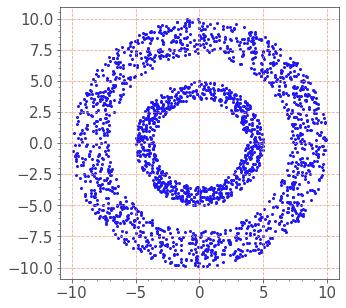

In [3]:
import matplotlib.pyplot as plt

plt.style.use(plot_style)

fig, ax = plt.subplots(figsize=(5,5))
x = []
y = []
R = 10
for i in range(1400):
    theta = np.random.uniform(0,2*np.pi)
    r = np.random.uniform(R/2,R)
    x.append(np.sqrt(r*R)*np.cos(theta))
    y.append(np.sqrt(r*R)*np.sin(theta))

    
for i in range(800):
    theta = np.random.uniform(0,2*np.pi)
    r = np.random.uniform(R/8,R/4)
    x.append(np.sqrt(r*R)*np.cos(theta))
    y.append(np.sqrt(r*R)*np.sin(theta))

dataset = np.vstack((x,y)).T
    
plt.scatter(x,y)
plt.show()

In [4]:
dataset

array([[-2.95536878,  9.47507904],
       [-5.05043526, -6.19627592],
       [ 5.7201619 , -5.73335582],
       ...,
       [-3.96909743, -0.55458001],
       [ 2.07943425, -4.03657845],
       [ 4.08145293, -1.88217629]])

In [42]:
#___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

ma = MultivariateAmputation(
    patterns = [ {'incomplete_vars': [0], 'mechanism': "MAR"} ],
    prop = 0.5
)
X_miss = ma.fit_transform(dataset)

2022-10-24 15:02:41,186 [WARNING] Failed to load lookup table for a prespecified score to probability function. It is possible /data/Users/ash/Desktop/Coursework/pyampute_utils/data/shift_lookup.csv is missing, in the wrong location, or corrupted. Try rerunning /amputation/scripts.py to regenerate the lookup table.


In [43]:
X_miss

array([[-2.95536878,  9.47507904],
       [-5.05043526, -6.19627592],
       [        nan, -5.73335582],
       ...,
       [-3.96909743, -0.55458001],
       [        nan, -4.03657845],
       [ 4.08145293, -1.88217629]])

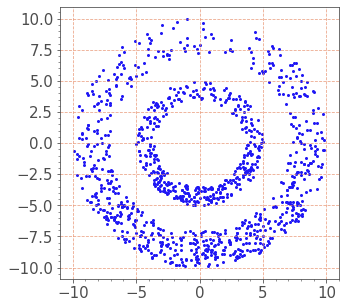

In [44]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(X_miss[:, 0],X_miss[:, 1])
plt.xlim(-11, 11)
plt.show()

In [36]:
imp = IterativeImputer(estimator = BayesianRidge()).fit_transform(X_miss)
imp

array([[ 0.35988673,  9.47507904],
       [-5.05043526, -6.19627592],
       [ 5.7201619 , -5.73335582],
       ...,
       [-3.96909743, -0.55458001],
       [ 2.07943425, -4.03657845],
       [ 4.08145293, -1.88217629]])

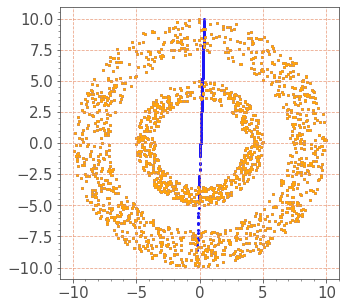

In [37]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(imp[:, 0],imp[:, 1])
plt.scatter(X_miss[:, 0],X_miss[:, 1])
plt.xlim(-11, 11)
plt.show()

In [29]:
ICE = IterativeImputer(max_iter = 50, random_state = 0, estimator = BayesianRidge(), sample_posterior = True).fit_transform(X_miss)

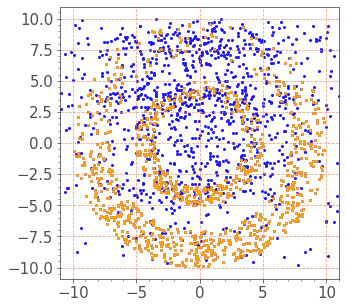

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(ICE[:, 0],ICE[:, 1])
plt.scatter(X_miss[:, 0],X_miss[:, 1])
plt.xlim(-11, 11)
plt.show()

In [47]:
imp_mice = []
for m in range(5):
    imp = IterativeImputer(max_iter = 50, random_state = m, estimator = BayesianRidge(), sample_posterior = True).fit_transform(X_miss)
    imp_mice.append(imp)
    
puk = np.array(imp_mice).mean(axis=0)

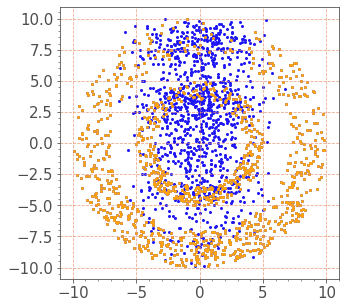

In [48]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(puk[:, 0],puk[:, 1])
plt.scatter(X_miss[:, 0],X_miss[:, 1])
plt.xlim(-11, 11)
plt.show()

In [91]:
RFR = RRFR(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
#         max_samples=0.5,
        n_jobs=2,
        random_state=0,
    )

In [17]:
imp_mice = []
for m in range(5):
    imp = IterativeImputer(max_iter = 50, random_state = m, estimator = RFR, sample_posterior = False).fit_transform(X_miss)
    imp_mice.append(imp)
    
RandddddF = np.array(imp_mice).mean(axis=0)

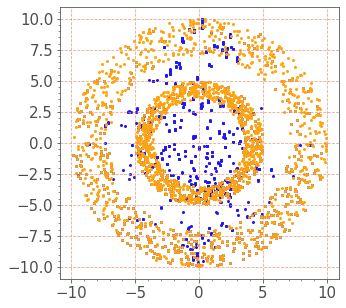

In [18]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(RandddddF[:, 0],RandddddF[:, 1])
plt.scatter(x,y)
plt.show()

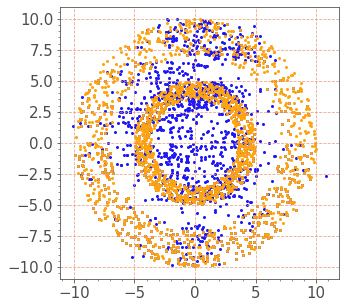

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(RandddddF[:, 0],RandddddF[:, 1])
plt.scatter(x,y)
plt.show()

In [38]:
imp_mice = []
for m in range(5):
    imp = IterativeImputer(max_iter = 50, random_state = m, estimator = RandomForestRegressor(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
#         max_samples=0.5,
        n_jobs=2,
        random_state=m,
    ), sample_posterior = False).fit_transform(X_miss)
    imp_mice.append(imp)
    
RandF = np.array(imp_mice).mean(axis=0)

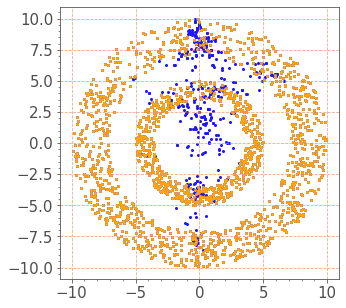

In [39]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(RandF[:, 0],RandF[:, 1])
plt.scatter(X_miss[:, 0],X_miss[:, 1])
plt.show()

In [45]:
imp_mice = []
for m in range(5):
    imp = IterativeImputer(max_iter = 50, random_state = m, estimator = RandomForestRegressor(
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
        n_jobs=2,
        random_state=m,
    ), sample_posterior = True).fit_transform(X_miss)
    imp_mice.append(imp)
    
RandF = np.array(imp_mice).mean(axis=0)

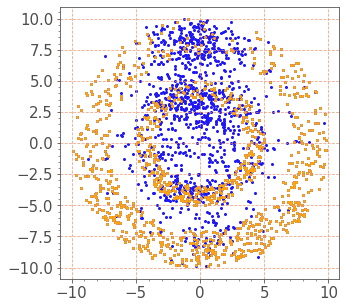

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(RandF[:, 0],RandF[:, 1])
plt.scatter(X_miss[:, 0],X_miss[:, 1])
plt.show()

In [24]:
imp2 = imp.copy()
imp3 = imp.copy()

In [27]:
def data_gener_X(n, mu, ro):
    #continious data
    Sigma = np.array([[1, ro, ro], [ro, 1, ro], [ro, ro, 1]])
    X_cont = np.random.multivariate_normal(mu, Sigma, size = n)

    return X_cont

In [32]:
dats = [ data_gener_X(5, [5 , 5, 10], 1/( i+ 1)) for i in range(5)]

In [34]:
dats

[array([[ 4.63339685,  4.63339685,  9.63339685],
        [ 3.29434326,  3.29434326,  8.29434326],
        [ 4.90857223,  4.90857223,  9.90857223],
        [ 4.72635334,  4.72635334,  9.72635334],
        [ 5.71100463,  5.71100463, 10.71100463]]),
 array([[ 3.55501809,  5.30437558, 10.07668683],
        [ 4.06473418,  4.92343737,  9.2071405 ],
        [ 4.10782225,  6.23324498, 11.1340362 ],
        [ 4.5132004 ,  5.32123617, 10.7631902 ],
        [ 6.32364944,  6.30021283, 10.56902588]]),
 array([[ 5.32895683,  4.09532521,  9.51273416],
        [ 5.92761567,  5.49911358, 10.03046464],
        [ 4.03564362,  4.75986424,  9.11484499],
        [ 4.80715478,  5.97926961, 12.00037182],
        [ 4.64720078,  4.35072823,  9.60301575]]),
 array([[ 3.6082655 ,  5.96058916,  9.17118888],
        [ 4.25066389,  6.73738057, 10.93924902],
        [ 4.31273302,  4.7851057 ,  9.08599413],
        [ 4.20053915,  4.9937011 ,  7.91147343],
        [ 5.48901378,  4.75506307,  9.61485624]]),
 array([[ 5.

In [35]:
(4.63339685+3.55501809+5.32895683+3.6082655+5.34055458)/5

4.493238369999999

In [33]:
np.array(dats).mean(axis=0)

array([[ 4.49323837,  5.11877929,  9.7218442 ],
       [ 5.03065617,  5.26194015,  9.71643674],
       [ 4.47803465,  5.10109207, 10.03839791],
       [ 4.58972847,  5.01417298,  9.79727137],
       [ 5.45950335,  5.26510676, 10.08376082]])